<a href="https://colab.research.google.com/github/HusnaMundambra/Husna-Mundambra/blob/main/Anemia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("/content/Anemia Data.csv")
df.head()


,Age,gender,MCV,HCT,MCHC,RDW,MCH,RBC,Hb,Result
0,52.0,M,85.2,39.2,35.3,13.1,30.0,4.60,13.8,0
1,43.0,M,88.3,39.1,35.5,13.0,31.3,4.43,13.9,0
2,57.0,M,82.8,38.3,34.4,13.6,28.5,4.63,13.2,0
3,36.0,M,81.2,41.0,35.5,13.5,28.9,5.05,14.6,0
4,39.0,M,86.5,41.9,34.5,13.2,29.8,4.85,14.4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     198 non-null    float64
 1   gender  202 non-null    object 
 2   MCV     202 non-null    float64
 3   HCT     202 non-null    float64
 4   MCHC    202 non-null    float64
 5   RDW     202 non-null    float64
 6   MCH     202 non-null    float64
 7   RBC     202 non-null    float64
 8   Hb      202 non-null    float64
 9   Result  202 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
mean=df['Age'].mean()
df['Age'].fillna(value=mean, inplace=True)


In [5]:
df.isnull().sum()

Age       0
gender    0
MCV       0
HCT       0
MCHC      0
RDW       0
MCH       0
RBC       0
Hb        0
Result    0
dtype: int64

In [6]:
df.describe()

,Age,MCV,HCT,MCHC,RDW,MCH,RBC,Hb,Result
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,38.121212,83.523267,36.275743,34.559406,14.633168,28.894554,4.352426,12.551485,0.504950
std,26.108565,7.278477,5.618985,0.984222,1.573676,2.935326,0.608931,2.077652,0.501218
min,0.000000,58.600000,23.000000,31.700000,11.500000,19.200000,2.710000,7.800000,0.000000
25%,15.000000,79.825000,32.525000,34.000000,13.500000,27.300000,3.960000,11.200000,0.000000
50%,38.121212,83.250000,36.450000,34.600000,14.100000,28.900000,4.390000,12.450000,1.000000
75%,62.750000,86.900000,40.075000,35.200000,15.600000,30.375000,4.785000,13.800000,1.000000
max,85.000000,107.700000,51.900000,37.100000,20.600000,37.800000,5.870000,19.100000,1.000000


In [7]:
df.groupby(['gender','Result'])['Result'].count()

gender  Result
F       0         41
        1         62
M       0         59
        1         40
Name: Result, dtype: int64

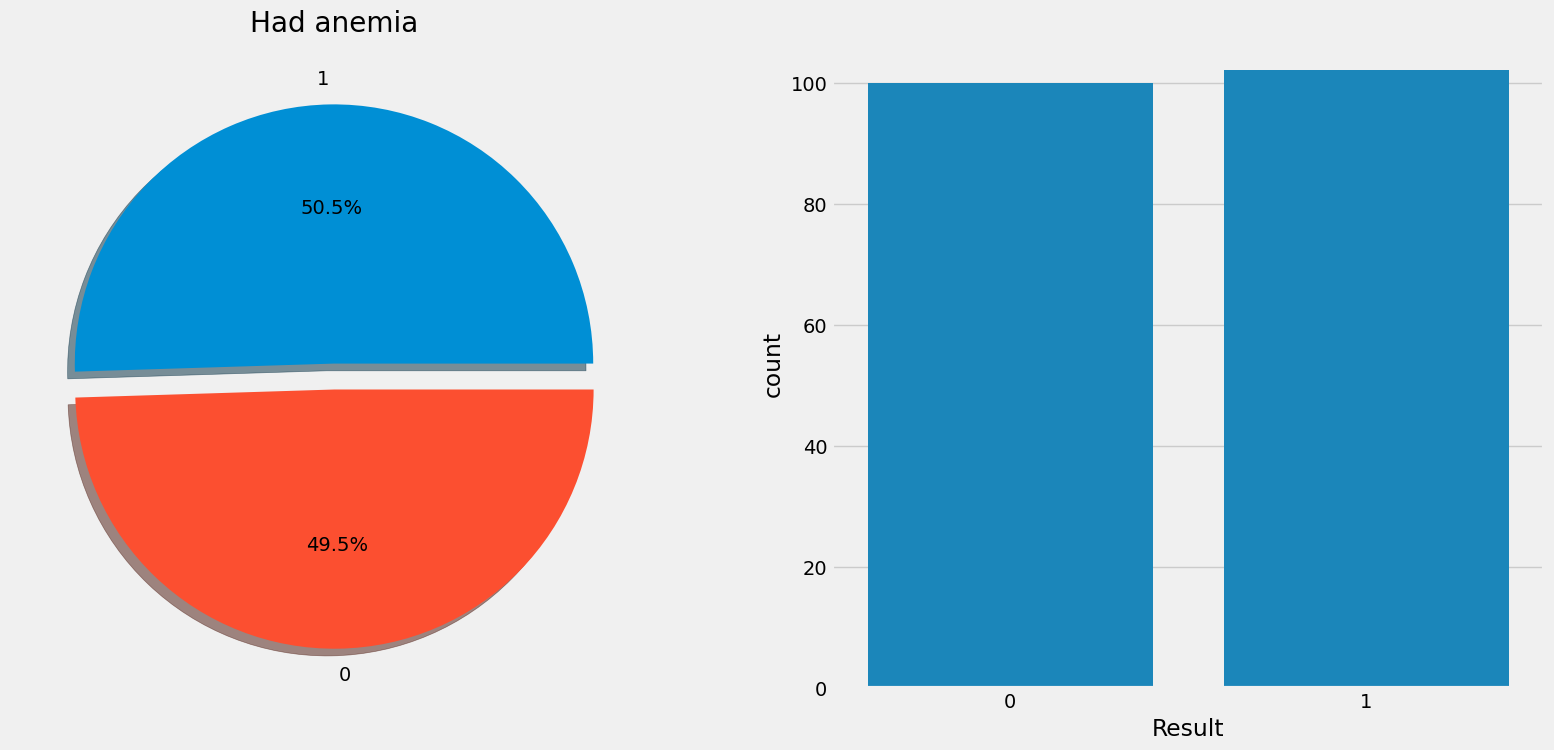

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Had anemia')
ax[0].set_ylabel('')
sns.countplot(x ='Result', data = df)
plt.show()

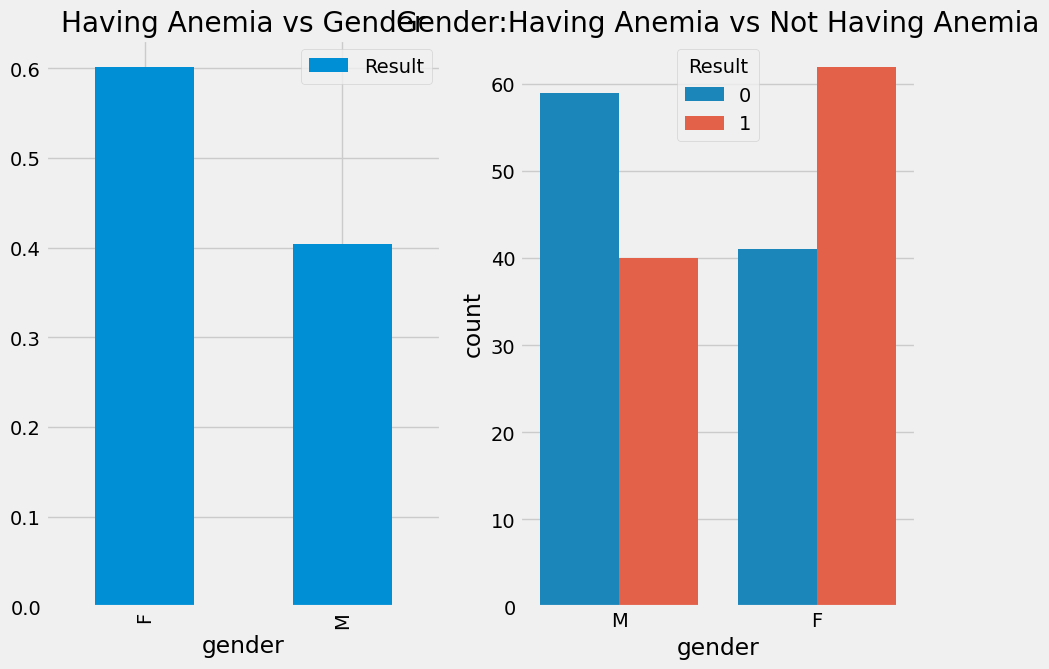

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,7))
df[['gender','Result']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
sns.countplot(x ='gender',hue='Result', data = df)
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()

In [10]:
df.loc[df['gender']=='M','gender',]=0
df.loc[df['gender']=='F','gender',]=1
df.head()

,Age,gender,MCV,HCT,MCHC,RDW,MCH,RBC,Hb,Result
0,52.0,0,85.2,39.2,35.3,13.1,30.0,4.60,13.8,0
1,43.0,0,88.3,39.1,35.5,13.0,31.3,4.43,13.9,0
2,57.0,0,82.8,38.3,34.4,13.6,28.5,4.63,13.2,0
3,36.0,0,81.2,41.0,35.5,13.5,28.9,5.05,14.6,0
4,39.0,0,86.5,41.9,34.5,13.2,29.8,4.85,14.4,0


<ipython-input-11-b54cf67d580e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


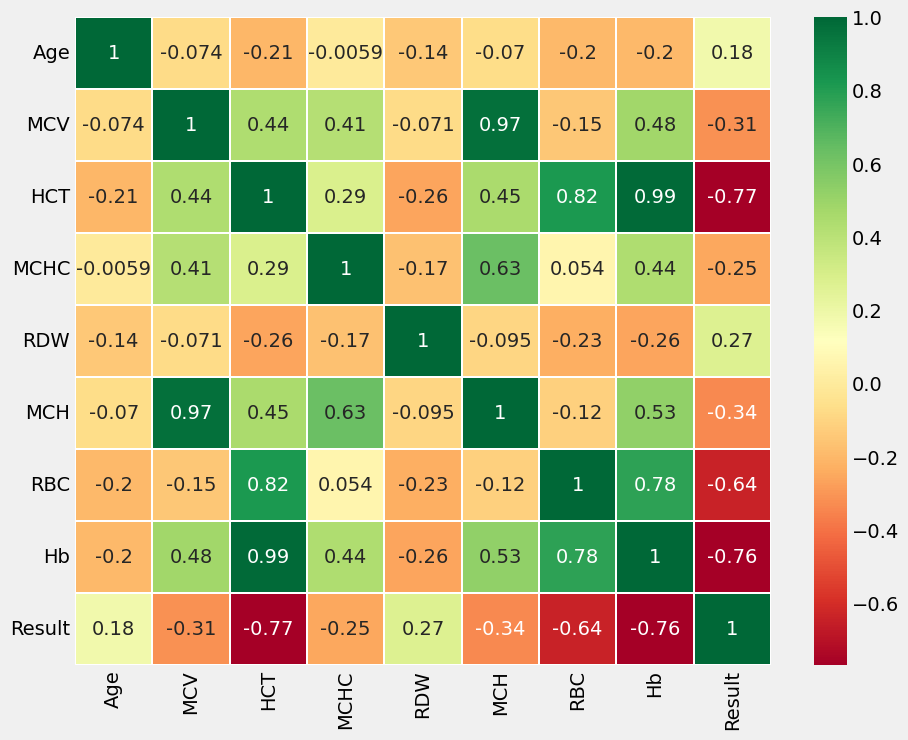

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import precision_score,f1_score,recall_score

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction1))
print('F1 score: %.3f' % f1_score(y_test,prediction1))
print('Recall: %.3f' % recall_score(y_test,prediction1))

Accuracy for rbf SVM is  0.9024390243902439
Precision: 0.824
F1 score: 0.875
Recall: 0.933


In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction3,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction3))
print('F1 score: %.3f' % f1_score(y_test,prediction3))
print('Recall: %.3f' % recall_score(y_test,prediction3))

The accuracy of the Logistic Regression is 0.9024390243902439
Accuracy for rbf SVM is  0.9024390243902439
Precision: 0.824
F1 score: 0.875
Recall: 0.933


In [30]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction4,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction4))
print('F1 score: %.3f' % f1_score(y_test,prediction4))
print('Recall: %.3f' % recall_score(y_test,prediction4))

The accuracy of the Decision Tree is 0.9512195121951219
Accuracy for rbf SVM is  0.9512195121951219
Precision: 0.933
F1 score: 0.933
Recall: 0.933


In [19]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
prediction5=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction5,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction5))
print('F1 score: %.3f' % f1_score(y_test,prediction5))
print('Recall: %.3f' % recall_score(y_test,prediction5))

The accuracy of the KNN is 0.8780487804878049
Accuracy for rbf SVM is  0.8780487804878049
Precision: 0.857
F1 score: 0.828
Recall: 0.800


In [20]:
model=GaussianNB()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction6,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction6))
print('F1 score: %.3f' % f1_score(y_test,prediction6))
print('Recall: %.3f' % recall_score(y_test,prediction6))

The accuracy of the NaiveBayes is 0.8780487804878049
Accuracy for rbf SVM is  0.8780487804878049
Precision: 0.778
F1 score: 0.848
Recall: 0.933


In [21]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
prediction7=model.predict(x_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction7,y_test))
print('Precision: %.3f' % precision_score(y_test,prediction7))
print('F1 score: %.3f' % f1_score(y_test,prediction7))
print('Recall: %.3f' % recall_score(y_test,prediction7))

The accuracy of the Random Forests is 0.926829268292683
Accuracy for rbf SVM is  0.926829268292683
Precision: 0.875
F1 score: 0.903
Recall: 0.933
